# Google Mobility Data Explore

https://www.google.com/covid19/mobility/

In [1]:
import pandas as pd
from collections import Counter

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from simpledbf import Dbf5
import seaborn as sns
from matplotlib.patches import Polygon
from matplotlib.colors import ListedColormap
from matplotlib.collections import PatchCollection
%matplotlib inline

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


In [2]:
df = pd.read_csv('./data/Global_Mobility_Report.csv')
df = df[df['country_region'] == 'United States']
df['concat_county_state'] = df['sub_region_2'] +", " + df['sub_region_1']

/home/theo/anaconda3/envs/geo_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
county_means = df.groupby(by = ['concat_county_state']).mean()

In [4]:
cnty_sorted = county_means.sort_values(by = 'parks_percent_change_from_baseline', ascending = True).reset_index()
cnty_sorted.head()

,concat_county_state,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,"Uvalde County, Texas",-6.407407,-2.942308,-63.000000,NaN,-16.842105,NaN
1,"Cass County, Nebraska",-28.392157,NaN,-63.000000,NaN,-16.684211,1.227273
2,"Graham County, Arizona",-5.350877,18.615385,-63.000000,NaN,-13.684211,3.972222
3,"Blanco County, Texas",-3.333333,9.235294,-61.166667,NaN,-18.911111,NaN
4,"Morrison County, Minnesota",-9.622642,3.156863,-61.000000,NaN,-13.157895,3.241379


In [5]:
len(df.concat_county_state.unique())

2825

In [6]:
cnty_sorted[cnty_sorted['concat_county_state'] == 'Cook County, Illinois']

,concat_county_state,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
439,"Cook County, Illinois",-19.333333,-0.842105,2.140351,-27.45614,-23.210526,9.421053


In [7]:
df[df['concat_county_state'] == 'Cook County, Illinois']

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,concat_county_state
104693,US,United States,Illinois,Cook County,2020-02-15,5.0,1.0,17.0,3.0,2.0,-1.0,"Cook County, Illinois"
104694,US,United States,Illinois,Cook County,2020-02-16,9.0,2.0,40.0,2.0,1.0,-2.0,"Cook County, Illinois"
104695,US,United States,Illinois,Cook County,2020-02-17,2.0,-4.0,-18.0,-15.0,-24.0,6.0,"Cook County, Illinois"
104696,US,United States,Illinois,Cook County,2020-02-18,1.0,0.0,6.0,2.0,1.0,0.0,"Cook County, Illinois"
104697,US,United States,Illinois,Cook County,2020-02-19,1.0,-2.0,1.0,1.0,1.0,0.0,"Cook County, Illinois"
104698,US,United States,Illinois,Cook County,2020-02-20,0.0,0.0,1.0,0.0,2.0,0.0,"Cook County, Illinois"
104699,US,United States,Illinois,Cook County,2020-02-21,2.0,0.0,8.0,3.0,3.0,-1.0,"Cook County, Illinois"
104700,US,United States,Illinois,Cook County,2020-02-22,11.0,7.0,64.0,10.0,6.0,-3.0,"Cook County, Illinois"
104701,US,United States,Illinois,Cook County,2020-02-23,11.0,9.0,118.0,6.0,3.0,-2.0,"Cook County, Illinois"
104702,US,United States,Illinois,Cook County,2020-02-24,2.0,5.0,-1.0,1.0,2.0,0.0,"Cook County, Illinois"


In [8]:
cnty_sorted[cnty_sorted['concat_county_state'] == 'Arlington County, Virginia']

,concat_county_state,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
236,"Arlington County, Virginia",-28.649123,-7.421053,-11.45614,-37.684211,-32.526316,14.105263


## Take means of last 30 days for each place

In [9]:
park_mean = []

for cnty in df['concat_county_state'].unique():
    df_sub = df[df['concat_county_state'] == cnty][-30:]
    try:
        state = df_sub['sub_region_1'].iloc[0]
    except:
        state = None
    park_mean.append({'cnty_state': cnty,
                      'state': state,
                     'park_change_30d': df_sub['parks_percent_change_from_baseline'].mean() })

In [10]:
df_park = pd.DataFrame(park_mean)
df_park.head()

,cnty_state,state,park_change_30d
0,NaN,None,NaN
1,"Autauga County, Alabama",Alabama,-14.000000
2,"Baldwin County, Alabama",Alabama,-6.233333
3,"Barbour County, Alabama",Alabama,NaN
4,"Bibb County, Alabama",Alabama,NaN


In [11]:
# remove NaN on cnty_state
df_park.dropna(subset = ['cnty_state'], inplace = True)
df_park.fillna(0,inplace=True)
df_park.head()
#df_park.sort_values(by = 'park_change_30d').head(20)

,cnty_state,state,park_change_30d
1,"Autauga County, Alabama",Alabama,-14.000000
2,"Baldwin County, Alabama",Alabama,-6.233333
3,"Barbour County, Alabama",Alabama,0.000000
4,"Bibb County, Alabama",Alabama,0.000000
5,"Blount County, Alabama",Alabama,0.000000


/home/theo/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/theo/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


3410


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,RINGNUM,SHAPENUM
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,,,,A,1477641638,10701538,+41.9158651,-096.7885168,1,1
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,,,,A,680956787,61588406,+46.2946377,-123.4244583,1,2
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,,,,A,6016761648,29147345,+34.3592729,-104.3686961,1,3
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,,A,2169252486,22867561,+40.7835474,-096.6886584,1,4
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,,,,A,1489645186,1718484,+40.1764918,-098.0468422,1,5


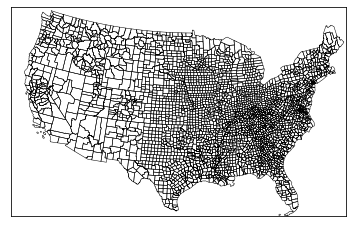

In [12]:
map = Basemap(projection = 'lcc', resolution = 'l', \
                 lat_1 = 33, lat_2 = 45, lon_0 = -95,\
                 llcrnrlon = -120, llcrnrlat = 22, urcrnrlon = -64.5, urcrnrlat = 49)
    
map.readshapefile('./data/tl_2017_us_county/tl_2017_us_county', \
                      name = 'counties', drawbounds = True)

# Map State FIPS to State name

print(len(map.counties_info))

# transform into list of dictionaries into a dataframe

counties_df = pd.DataFrame(map.counties_info)  # note: dome GEOIDs of counties are duplicated (multiple rings)
counties_df.head()

In [13]:
counties_df[counties_df['STATEFP'] == '37']

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,RINGNUM,SHAPENUM
23,37,037,01008544,37037,Chatham,Chatham County,06,H1,G4020,450,20500,,A,1765011149,71264075,+35.7049939,-079.2514542,1,24
60,37,001,01008531,37001,Alamance,Alamance County,06,H1,G4020,268,15500,,A,1096654286,28025249,+36.0439535,-079.4005733,1,60
93,37,057,01008548,37057,Davidson,Davidson County,06,H1,G4020,268,49180,,A,1432711780,37452228,+35.7951312,-080.2071070,1,92
186,37,069,01008553,37069,Franklin,Franklin County,06,H1,G4020,450,39580,,A,1273631713,7304032,+36.0882406,-078.2830903,1,183
224,37,155,01026130,37155,Robeson,Robeson County,06,H1,G4020,246,31300,,A,2453425443,5097482,+34.6392096,-079.1008811,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,37,175,01008589,37175,Transylvania,Transylvania County,06,H1,G4020,120,14820,,A,980105287,5145714,+35.2100794,-082.8166530,1,3112
3285,37,171,01008587,37171,Surry,Surry County,06,H1,G4020,268,34340,,A,1382436644,10286511,+36.4154160,-080.6864631,1,3113
3327,37,043,01008546,37043,Clay,Clay County,06,H1,G4020,,,,A,556804508,15017754,+35.0529971,-083.7522638,1,3155
3336,37,055,01026133,37055,Dare,Dare County,06,H1,G4020,545,28620,,A,992522471,3000549341,+35.6062688,-075.7675364,1,3164


# Give each row in the google data corresponding GEOID

- Purpose of this is to be able to join to a unique identifier in Tiger shapefile

In [14]:
# Read in look up table for state FIPS
states = pd.read_csv('./data/state_codes.csv')
# change FIPS to string fixed width (leading zero for single digit)
states['FIPS'] = states['FIPS'].apply(lambda x: '{0:0>2}'.format(x))
states.head()

,FIPS,Name,Postal Code
0,01,Alabama,AL
1,02,Alaska,AK
2,04,Arizona,AZ
3,05,Arkansas,AR
4,06,California,CA


In [15]:
df_park.head()

,cnty_state,state,park_change_30d
1,"Autauga County, Alabama",Alabama,-14.000000
2,"Baldwin County, Alabama",Alabama,-6.233333
3,"Barbour County, Alabama",Alabama,0.000000
4,"Bibb County, Alabama",Alabama,0.000000
5,"Blount County, Alabama",Alabama,0.000000


In [16]:
# Separate county name and state name
df_park['county_name'] = df_park.cnty_state.str.split(',',expand = True)[0]
df_park['state_name'] = df_park.state
df_park = df_park.merge(states, left_on = 'state_name', right_on = 'Name')
df_park.head()

,cnty_state,state,park_change_30d,county_name,state_name,FIPS,Name,Postal Code
0,"Autauga County, Alabama",Alabama,-14.000000,Autauga County,Alabama,01,Alabama,AL
1,"Baldwin County, Alabama",Alabama,-6.233333,Baldwin County,Alabama,01,Alabama,AL
2,"Barbour County, Alabama",Alabama,0.000000,Barbour County,Alabama,01,Alabama,AL
3,"Bibb County, Alabama",Alabama,0.000000,Bibb County,Alabama,01,Alabama,AL
4,"Blount County, Alabama",Alabama,0.000000,Blount County,Alabama,01,Alabama,AL


In [18]:
geoids = []
county_level_names = ['County', 'Parish', 'Borough']

for i, row in df_park.iterrows():
    # Because County Names are not unique, need to subset to state, then look
    #  for county name and return GEOID
    
    county_name_cur = row['county_name']
    state_fips_cur = row['FIPS']
    nwords_county = len(row['county_name'].split(' '))
    
    if county_name_cur.split(" ")[-1] in county_level_names:  #(then a county, and should look up full name in NAMELSAD col of counties_df) ***this doesn't work
        print(county_name_cur)
        
        # make an exception for La Salle
        if county_name_cur == 'La Salle Parish':
            county_name_cur = 'LaSalle Parish'
        
        # make an exception for Shannon County, SD (now named 'Oglala Lakota County')
        if ((county_name_cur == 'Shannon County') & (state_fips_cur=='46')):
            county_name_cur = 'Oglala Lakota County'
        
        geoid = counties_df['GEOID'][(counties_df['STATEFP'] == state_fips_cur) & (counties_df['NAMELSAD'] == county_name_cur)].values[0]
    
    else: # may be a city name, just look up in 'NAME' column and pick row that does NOT have County in it
        print(county_name_cur)
        county_name_cur_first_word = county_name_cur.replace(' County', '')
        county_name_cur_first_word = county_name_cur_first_word.replace(' Parish', '')
        namematches = counties_df[(counties_df['STATEFP'] == state_fips_cur) & (counties_df['NAME'] == county_name_cur_first_word)]
        
        # there may be multiple namematches (rows in counties_df), want the one
        # that is NOT county_name_cur_first_word + 'County'
        
        #print(namematches)
        
        geoid_mult = []
        
        for ii, rrow in namematches.iterrows():
            if rrow['NAMELSAD'].split()[1] == 'County':  # don't add the geoid if it is the County
                pass
            else:
                geoid_mult.append(rrow['GEOID'])  
        
        #print (geoid_mult)
        
        # make sure geoid_mult has only one (there should not be multiple unique GEOIDs)
        if len(set(geoid_mult)) > 1:
            print("WARNING: multiple non-county geoids")
        else:
            geoid = geoid_mult[0]
        
    #print(geoid)
    
    geoids.append(geoid)

Autauga County
Baldwin County
Barbour County
Bibb County
Blount County
Bullock County
Butler County
Calhoun County
Chambers County
Cherokee County
Chilton County
Choctaw County
Clarke County
Clay County
Cleburne County
Coffee County
Colbert County
Conecuh County
Coosa County
Covington County
Crenshaw County
Cullman County
Dale County
Dallas County
DeKalb County
Elmore County
Escambia County
Etowah County
Fayette County
Franklin County
Geneva County
Greene County
Hale County
Henry County
Houston County
Jackson County
Jefferson County
Lamar County
Lauderdale County
Lawrence County
Lee County
Limestone County
Lowndes County
Macon County
Madison County
Marengo County
Marion County
Marshall County
Mobile County
Monroe County
Montgomery County
Morgan County
Perry County
Pickens County
Pike County
Randolph County
Russell County
Shelby County
St. Clair County
Sumter County
Talladega County
Tallapoosa County
Tuscaloosa County
Walker County
Washington County
Wilcox County
Winston County
Anchorag

Franklin County
Fulton County
Gallatin County
Greene County
Grundy County
Hamilton County
Hancock County
Henderson County
Henry County
Iroquois County
Jackson County
Jasper County
Jefferson County
Jersey County
Jo Daviess County
Johnson County
Kane County
Kankakee County
Kendall County
Knox County
Lake County
LaSalle County
Lawrence County
Lee County
Livingston County
Logan County
Macon County
Macoupin County
Madison County
Marion County
Marshall County
Mason County
Massac County
McDonough County
McHenry County
McLean County
Menard County
Mercer County
Monroe County
Montgomery County
Morgan County
Moultrie County
Ogle County
Peoria County
Perry County
Piatt County
Pike County
Pulaski County
Putnam County
Randolph County
Richland County
Rock Island County
Saline County
Sangamon County
Schuyler County
Shelby County
St. Clair County
Stark County
Stephenson County
Tazewell County
Union County
Vermilion County
Wabash County
Warren County
Washington County
Wayne County
White County
Whiteside

Oscoda County
Otsego County
Ottawa County
Presque Isle County
Roscommon County
Saginaw County
Sanilac County
Schoolcraft County
Shiawassee County
St. Clair County
St. Joseph County
Tuscola County
Van Buren County
Washtenaw County
Wayne County
Wexford County
Aitkin County
Anoka County
Becker County
Beltrami County
Benton County
Big Stone County
Blue Earth County
Brown County
Carlton County
Carver County
Cass County
Chippewa County
Chisago County
Clay County
Clearwater County
Cook County
Cottonwood County
Crow Wing County
Dakota County
Dodge County
Douglas County
Faribault County
Fillmore County
Freeborn County
Goodhue County
Grant County
Hennepin County
Houston County
Hubbard County
Isanti County
Itasca County
Jackson County
Kanabec County
Kandiyohi County
Koochiching County
Lac qui Parle County
Lake County
Lake of the Woods County
Le Sueur County
Lincoln County
Lyon County
Mahnomen County
Marshall County
Martin County
McLeod County
Meeker County
Mille Lacs County
Morrison County
Mower 

Rolette County
Sargent County
Stark County
Stutsman County
Traill County
Walsh County
Ward County
Williams County
Adams County
Allen County
Ashland County
Ashtabula County
Athens County
Auglaize County
Belmont County
Brown County
Butler County
Carroll County
Champaign County
Clark County
Clermont County
Clinton County
Columbiana County
Coshocton County
Crawford County
Cuyahoga County
Darke County
Defiance County
Delaware County
Erie County
Fairfield County
Fayette County
Franklin County
Fulton County
Gallia County
Geauga County
Greene County
Guernsey County
Hamilton County
Hancock County
Hardin County
Harrison County
Henry County
Highland County
Hocking County
Holmes County
Huron County
Jackson County
Jefferson County
Knox County
Lake County
Lawrence County
Licking County
Logan County
Lorain County
Lucas County
Madison County
Mahoning County
Marion County
Medina County
Meigs County
Mercer County
Miami County
Monroe County
Montgomery County
Morgan County
Morrow County
Muskingum County
N

Panola County
Parker County
Parmer County
Pecos County
Polk County
Potter County
Presidio County
Rains County
Randall County
Reagan County
Real County
Red River County
Reeves County
Refugio County
Robertson County
Rockwall County
Runnels County
Rusk County
Sabine County
San Augustine County
San Jacinto County
San Patricio County
San Saba County
Scurry County
Shelby County
Sherman County
Smith County
Somervell County
Starr County
Stephens County
Sutton County
Swisher County
Tarrant County
Taylor County
Terry County
Titus County
Tom Green County
Travis County
Trinity County
Tyler County
Upshur County
Upton County
Uvalde County
Val Verde County
Van Zandt County
Victoria County
Walker County
Waller County
Ward County
Washington County
Webb County
Wharton County
Wheeler County
Wichita County
Wilbarger County
Willacy County
Williamson County
Wilson County
Winkler County
Wise County
Wood County
Yoakum County
Young County
Zapata County
Zavala County
Beaver County
Box Elder County
Cache County


In [19]:
df_park['GEOID'] = geoids  # now df_park has a column for geoid

In [20]:
df_park.head()

,cnty_state,state,park_change_30d,county_name,state_name,FIPS,Name,Postal Code,GEOID
0,"Autauga County, Alabama",Alabama,-14.000000,Autauga County,Alabama,01,Alabama,AL,01001
1,"Baldwin County, Alabama",Alabama,-6.233333,Baldwin County,Alabama,01,Alabama,AL,01003
2,"Barbour County, Alabama",Alabama,0.000000,Barbour County,Alabama,01,Alabama,AL,01005
3,"Bibb County, Alabama",Alabama,0.000000,Bibb County,Alabama,01,Alabama,AL,01007
4,"Blount County, Alabama",Alabama,0.000000,Blount County,Alabama,01,Alabama,AL,01009


In [21]:
df_park['park_change_30d'].describe()

count    2824.000000
mean       -0.507045
std        16.974786
min       -70.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       193.000000
Name: park_change_30d, dtype: float64

In [22]:
df_park['park_change_30d'].sort_values()

2532    -70.000000
2395    -67.909091
240     -67.300000
1204    -64.000000
1514    -63.000000
           ...    
1388     74.433333
2495     77.100000
857      84.266667
527      84.750000
2738    193.000000
Name: park_change_30d, Length: 2824, dtype: float64

In [23]:
df_park[df_park['county_name'] == 'Montgomery County']

,cnty_state,state,park_change_30d,county_name,state_name,FIPS,Name,Postal Code,GEOID
50,"Montgomery County, Alabama",Alabama,-2.100000,Montgomery County,Alabama,01,Alabama,AL,01101
139,"Montgomery County, Arkansas",Arkansas,0.000000,Montgomery County,Arkansas,05,Arkansas,AR,05097
449,"Montgomery County, Georgia",Georgia,0.000000,Montgomery County,Georgia,13,Georgia,GA,13209
607,"Montgomery County, Illinois",Illinois,0.000000,Montgomery County,Illinois,17,Illinois,IL,17135
693,"Montgomery County, Indiana",Indiana,0.000000,Montgomery County,Indiana,18,Indiana,IN,18107
799,"Montgomery County, Iowa",Iowa,0.000000,Montgomery County,Iowa,19,Iowa,IA,19137
868,"Montgomery County, Kansas",Kansas,0.000000,Montgomery County,Kansas,20,Kansas,KS,20125
974,"Montgomery County, Kentucky",Kentucky,0.000000,Montgomery County,Kentucky,21,Kentucky,KY,21173
1099,"Montgomery County, Maryland",Maryland,25.166667,Montgomery County,Maryland,24,Maryland,MD,24031
1334,"Montgomery County, Mississippi",Mississippi,0.000000,Montgomery County,Mississippi,28,Mississippi,MS,28097


# Make dictionary

In [24]:
dict1 = {}

for geoid in df_park['GEOID']:
    # fill in non-significant values with 0
    
    dict1[geoid] = df_park['park_change_30d'][df_park['GEOID'] == geoid].values[0]
    

# Make map

/home/theo/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/home/theo/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/theo/anaconda3/envs/geo_env/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


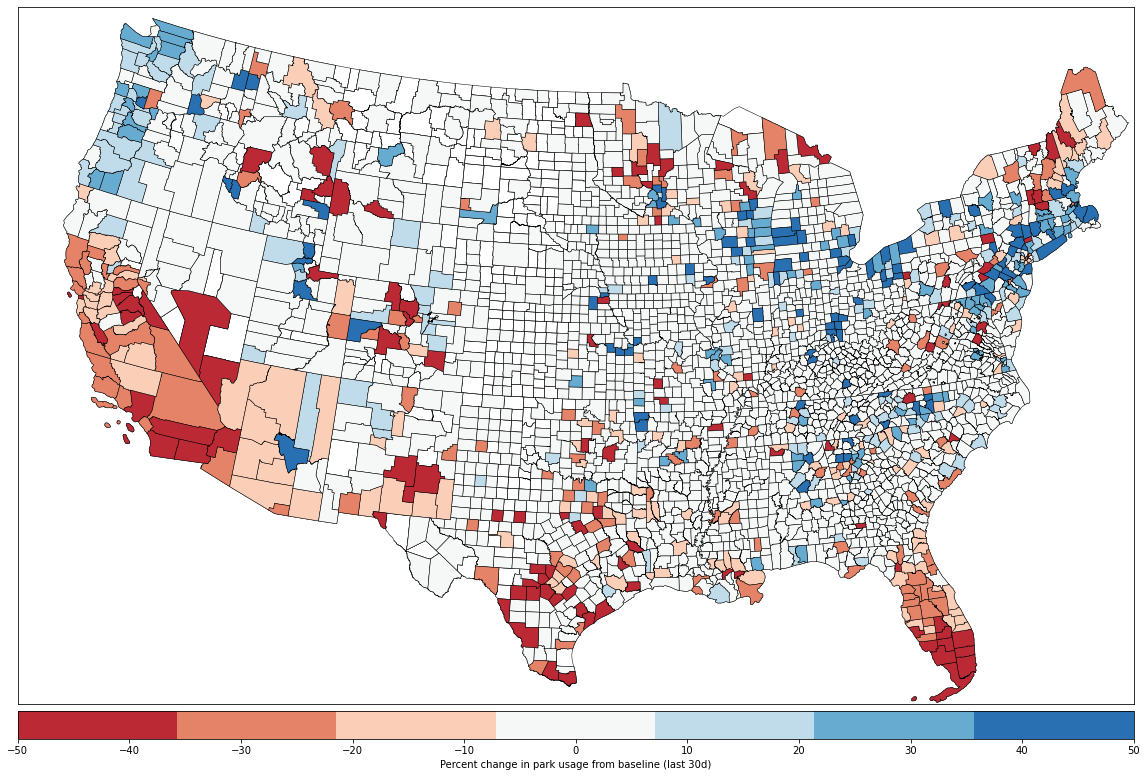

In [26]:
fig = plt.figure(figsize=(20,20))

map = Basemap(projection = 'lcc', resolution = 'l', \
                 lat_1 = 33, lat_2 = 45, lon_0 = -95,\
                 llcrnrlon = -120, llcrnrlat = 22, urcrnrlon = -64.5, urcrnrlat = 49)
    
map.readshapefile('/home/theo/Dropbox/data/00raw/tl_2017_us_county/tl_2017_us_county', \
                      name = 'counties', drawbounds = True)

patches = []
ticks=[-50,-40,-30, -20,-10,0,10,20, 30,40,50]
label = 'Percent change in park usage from baseline (last 30d)'

normmin = -50
normmax = 50
colvals = dict1.values()
cmap = ListedColormap(sns.color_palette("RdBu", 7))
norm = plt.Normalize(normmin, normmax)


for info, shape in zip(map.counties_info, map.counties):
    if info['GEOID'] in dict1.keys():
        color = cmap(norm(dict1[info['GEOID']]))
        patches.append( Polygon(np.array(shape), True, color = color))

ax = fig.add_subplot(111)
pc = PatchCollection(patches, match_original = True, edgecolor = 'black', linewidth = .5, zorder=2)
                       
ax.add_collection(pc)
sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
sm.set_array(colvals)
cb = map.colorbar(sm, location = 'bottom', size= '4%', pad = '1%', ticks = ticks)
cb.set_label(label)